<a href="https://colab.research.google.com/github/nidhipatel8/CS483_AI_-_ML/blob/main/Week_lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1.Gradient boosting classifier
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier 
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)

gbrt.fit(X_train, y_train)
print('The decision function for the 3-class iris dataset:\n\n{}'.format(gbrt.decision_function(X_test[:10])))
print('Predicted probabilities for the samples in the iris dataset:\n\n{}'.format(gbrt.predict_proba(X_test[:10])))


The decision function for the 3-class iris dataset:

[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99677434 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.995715    0.04758267 -1.92720695]]
Predicted probabilities for the samples in the iris dataset:

[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]
 [0.10217718 0.78840034 0.10942248]
 [0.09763381 0.11012538 0.79224081]
 [0.10217718 0.78840034 0.10942248]
 [0.10217718 0.78840034 0.10942248]]


In [ ]:
#2.Preprocessing
from sklearn import preprocessing 
import numpy as np 

data = np.array([[2.2, 5.9, -1.8], [5.4, -3.2, -5.1], [-1.9, 4.2, 3.2]])
bindata = preprocessing.Binarizer(threshold=1.5).transform(data)
print('Binarized data:\n\n', bindata)

print('Mean (before)= ', data.mean(axis=0))
print('Standard Deviation (before)= ', data.std(axis=0))
scaled_data = preprocessing.scale(data)

print('Mean (after)= ', scaled_data.mean(axis=0))
print('Standard Deviation (after)= ', scaled_data.std(axis=0))

data
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_minmax = minmax_scaler.fit_transform(data)
print('MinMaxScaler applied on the data:\n', data_minmax)

data
data_l1 = preprocessing.normalize(data, norm='l1')
data_l2 = preprocessing.normalize(data, norm='l2')

print('L1-normalized data:\n', data_l1)
print('\nL2-normalized data:\n', data_l2)


Binarized data:

 [[1. 1. 0.]
 [1. 0. 0.]
 [0. 1. 1.]]
Mean (before)=  [ 1.9         2.3        -1.23333333]
Standard Deviation (before)=  [2.98775278 3.95052739 3.41207008]
Mean (after)=  [0.00000000e+00 0.00000000e+00 7.40148683e-17]
Standard Deviation (after)=  [1. 1. 1.]
MinMaxScaler applied on the data:
 [[0.56164384 1.         0.39759036]
 [1.         0.         0.        ]
 [0.         0.81318681 1.        ]]
L1-normalized data:
 [[ 0.22222222  0.5959596  -0.18181818]
 [ 0.39416058 -0.23357664 -0.37226277]
 [-0.20430108  0.4516129   0.34408602]]

L2-normalized data:
 [[ 0.3359268   0.90089461 -0.2748492 ]
 [ 0.6676851  -0.39566524 -0.63059148]
 [-0.33858465  0.74845029  0.57024784]]


In [ ]:
#3.Label encoding 
import pandas as pd
from IPython.display import display

data = pd.read_csv('adult_data.txt', header=None, index_col=False, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
display(data)

print('Original Features:\n', list(data.columns), '\n') 
data_dummies = pd.get_dummies(data) 
print('Features after One-Hot Encoding:\n', list(data_dummies.columns))

features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Logistic Regression score on the test set: {:.2f}'.format(logreg.score(X_test, y_test)))


FileNotFoundError: ignored

X_train.shape is: (284, 80)
X_train_selected.shape is: (284, 40)
[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]
The score of Logistic Regression on all features: 0.916
The score of Logistic Regression on the selected features: 0.919


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The shape of X_train is:  (284, 80)
The shape of X_train_s is  (284, 40)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The score of Logistic Regression with the selected features on the test set: 0.930


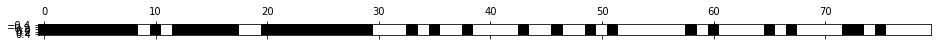

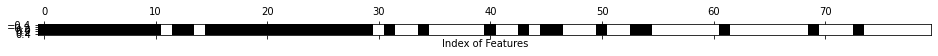

In [ ]:
#4.Automatic Feature Selection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
%matplotlib inline

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape is: {}'.format(X_train.shape))
print('X_train_selected.shape is: {}'.format(X_train_selected.shape))

mask = select.get_support() 
print(mask) 
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

X_test_selected = select.transform(X_test) 
logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 
print('The score of Logistic Regression on all features: {:.3f}'.format(logreg.score(X_test, y_test))) 
logreg.fit(X_train_selected, y_train) 
print('The score of Logistic Regression on the selected features: {:.3f}'.format(logreg.score(X_test_selected, y_test)))

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

select.fit(X_train, y_train)
X_train_s = select.transform(X_train)
print('The shape of X_train is: ', X_train.shape)
print('The shape of X_train_s is ', X_train_s.shape)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of Features')

X_test_s = select.transform(X_test)
score = LogisticRegression().fit(X_train_s, y_train).score(X_test_s, y_test)
print('The score of Logistic Regression with the selected features on the test set: {:.3f}'.format(score))
